In [1]:
import sys
from pathlib import Path
import os
cwd = os.getcwd()
parent = str(Path(cwd).parents[0])
sys.path.append(parent)

In [2]:
import schemdraw
from schemdraw import flow
import matplotlib.pyplot as plt 

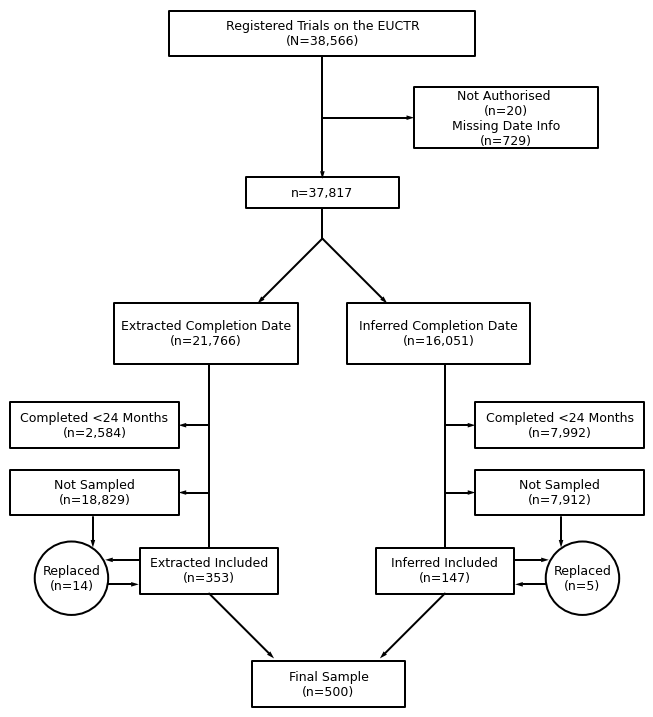

In [30]:
with schemdraw.Drawing() as d:
    d += flow.Box(w=10, h=1.5).label('Registered Trials on the EUCTR\n(N=38,566)')
    d += flow.Arrow('down', l=4).at((5,-.75))
    d += flow.Arrow('right').at((5,-2.75))
    d += flow.Box(w=6, h=2).label('Not Authorised \n(n=20)\nMissing Date Info\n(n=729)')
    d += flow.Box(w=5, h=1).label('n=37,817').at((2.5,-5.2))
    d += flow.Line('down', l=1).at((5, -5.7))
    d += flow.Arrow(l=3).theta(-45).at((5,-6.7))
    d += flow.Box(w=6, h=2).label('Inferred Completion Date\n(n=16,051)').at((5.8,-8.8))
    d += flow.Arrow(l=3).theta(225).at((5,-6.7))
    d += flow.Box(w=6, h=2).label('Extracted Completion Date\n(n=21,766)').at((4.2,-8.8))
    d += flow.Line('down', l=2).at((1.3, -10.8))
    d += flow.Arrow('left', l=1)
    d += flow.Box(w=5.5, h=1.5).label('Completed <24 Months\n(n=2,584)')
    d += flow.Line('down', l=2).at((9, -10.8))
    d += flow.Arrow('right', l=1)
    d += flow.Box(w=5.5, h=1.5).label('Completed <24 Months\n(n=7,992)')
    
    d += flow.Arrow('left', l=1).at((1.3, -15))
    d += flow.Box(w=5.5, h=1.5).label('Not Sampled\n(n=18,829)')
    d += flow.Arrow('down', l=1).at((-2.5, -15.8))
    
    d += flow.Arrow('right', l=1).at((9, -15))
    d += flow.Box(w=5.5, h=1.5).label('Not Sampled\n(n=7,912)')
    d += flow.Arrow('down', l=1).at((12.8, -15.8))
    
    d += flow.Line('down', l=4).at((9, -12.8))
    d += flow.Box(w=4.5, h=1.5).label('Inferred Included\n(n=147)')
    d += flow.Line('down', l=4).at((1.3, -12.8))
    d += flow.Box(w=4.5, h=1.5).label('Extracted Included\n(n=353)')
    
    #Extracted Replaced
    d += flow.Arrow('left', l=1.1).at((-1, -17.2))
    d += flow.Arrow('right', l=1).at((-2, -18))
    d += flow.Circle(r=1.2).label('Replaced\n(n=14)').at((-4.4, -17.8))
    
    #Inferred Replaced
    d += flow.Arrow('right', l=1.1).at((11.3, -17.2))
    d += flow.Arrow('left', l=1).at((12.3, -18))
    d += flow.Circle(r=1.2).label('Replaced\n(n=5)').at((14.7, -17.8))
    
    #Final
    d += flow.Arrow(l=3).theta(-45).at((1.3,-18.3))
    d += flow.Arrow(l=3).theta(225).at((9,-18.3))
    d += flow.Box(w=5, h=1.5).label('Final Sample\n(n=500)').at((7.7,-20.5))

#d.save(parent + '/data/Figures/flowchart.jpg')

In [31]:
from venn import venn

In [32]:
#These are sets of the indicies of each type of result

euctr = {0,1,2,3,4,6,7,8,9,10,11,12,14,15,18,20,22,25,26,27,35,36,37,39,40,45,48,49,54,55,56,57,58,60,61,62,63,64,65,67,68,74,77,79,81,83,87,90,94,95,96,97,98,99,102,103,104,105,108,109,112,114,117,118,119,120,122,123,127,132,134,135,136,138,140,141,142,143,150,151,154,156,157,158,159,161,162,167,168,171,175,176,178,179,181,182,183,184,185,188,189,190,191,195,197,198,201,203,204,205,207,208,209,212,213,217,218,221,222,223,224,226,228,230,234,236,242,243,244,248,250,252,255,257,258,259,260,261,262,265,267,270,271,272,273,274,276,277,278,279,281,282,285,286,288,292,293,297,298,299,302,303,304,307,309,315,316,318,319,320,323,325,326,328,329,330,332,333,334,335,337,338,339,342,343,344,348,349,350,351,352,353,358,359,361,362,367,371,372,375,376,377,381,382,383,388,390,392,394,396,398,399,401,402,403,405,408,409,410,413,416,418,424,425,426,428,429,430,434,436,437,438,439,440,442,443,444,446,448,450,454,455,457,458,459,461,463,466,469,470,476,480,482,483,484,486,487,488,489,492,493,496,498,499}
ctg = {0,2,3,7,8,22,36,37,39,48,54,57,63,67,74,79,83,87,94,95,96,97,98,102,104,106,122,123,127,136,142,150,151,156,157,158,161,175,178,179,181,182,185,191,193,197,198,205,207,216,217,218,221,223,224,226,234,248,250,251,252,257,260,262,265,270,271,273,278,279,281,285,286,293,297,299,303,304,307,315,320,325,328,329,337,342,343,348,349,350,355,358,361,362,367,370,372,376,381,383,388,394,396,398,401,403,405,406,408,410,416,426,434,437,440,442,445,446,448,450,453,454,457,466,469,471,476,480,484,486,498,499}
isrctn = {332, 335}
journals = {0,1,2,3,4,6,7,9,11,12,14,15,16,17,18,20,22,25,27,33,34,36,37,39,42,45,46,48,49,50,51,53,54,55,57,59,64,67,68,69,72,77,78,79,81,83,87,89,90,91,93,94,95,96,98,99,101,102,103,105,106,107,109,110,111,112,114,116,117,118,120,122,123,126,127,128,131,132,133,134,136,138,139,141,148,153,154,155,156,158,159,160,161,163,165,166,167,169,170,174,175,177,179,181,182,183,184,185,187,191,192,194,197,201,202,203,204,206,207,212,213,216,217,222,223,224,226,227,228,230,233,234,238,239,241,242,243,247,248,249,250,251,252,253,254,259,260,263,265,266,267,268,270,271,273,274,275,277,278,279,281,283,284,286,287,288,289,291,292,294,295,297,298,299,302,304,306,307,309,310,311,312,315,316,319,320,321,323,324,325,328,329,330,331,334,335,336,337,338,341,342,343,344,346,348,349,350,351,352,353,356,357,358,359,370,371,372,373,374,375,378,379,381,382,384,386,388,389,392,393,394,396,397,400,401,403,404,405,406,407,408,409,410,411,412,413,415,416,417,418,420,421,422,423,425,428,429,434,435,437,438,439,440,441,442,443,444,445,446,450,451,453,455,456,460,463,464,466,469,472,475,476,478,480,481,486,488,489,490,495,498,499}

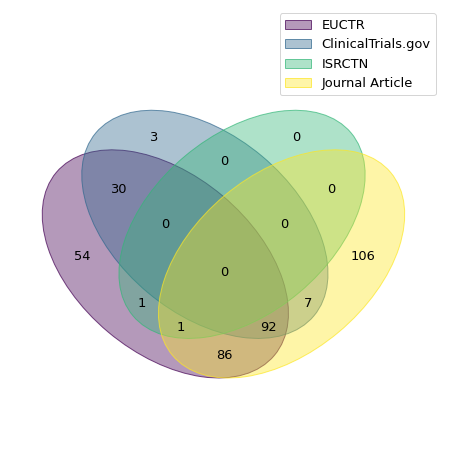

In [33]:
#You can create the Venn diagram below. For the final image, I've tidied it up in image editing software 
#rather than trying to mess about with this Venn package and Matplotlib

results = {'EUCTR': euctr, 'ClinicalTrials.gov': ctg, 'ISRCTN': isrctn, 'Journal Article': journals}

venn(results)

plt.show()

In [86]:
from upsetplot import from_indicators, plot
import pandas as pd
import numpy as np

In [87]:
df = pd.DataFrame(list(range(0,500)))
df.columns = ['ids']

In [88]:
df['EUCTR'] = np.where(df.ids.isin(euctr), True, False)
df['CTG'] = np.where(df.ids.isin(ctg), True, False)
df['ISRCTN'] = np.where(df.ids.isin(isrctn), True, False)
df['Journals'] = np.where(df.ids.isin(journals), True, False)

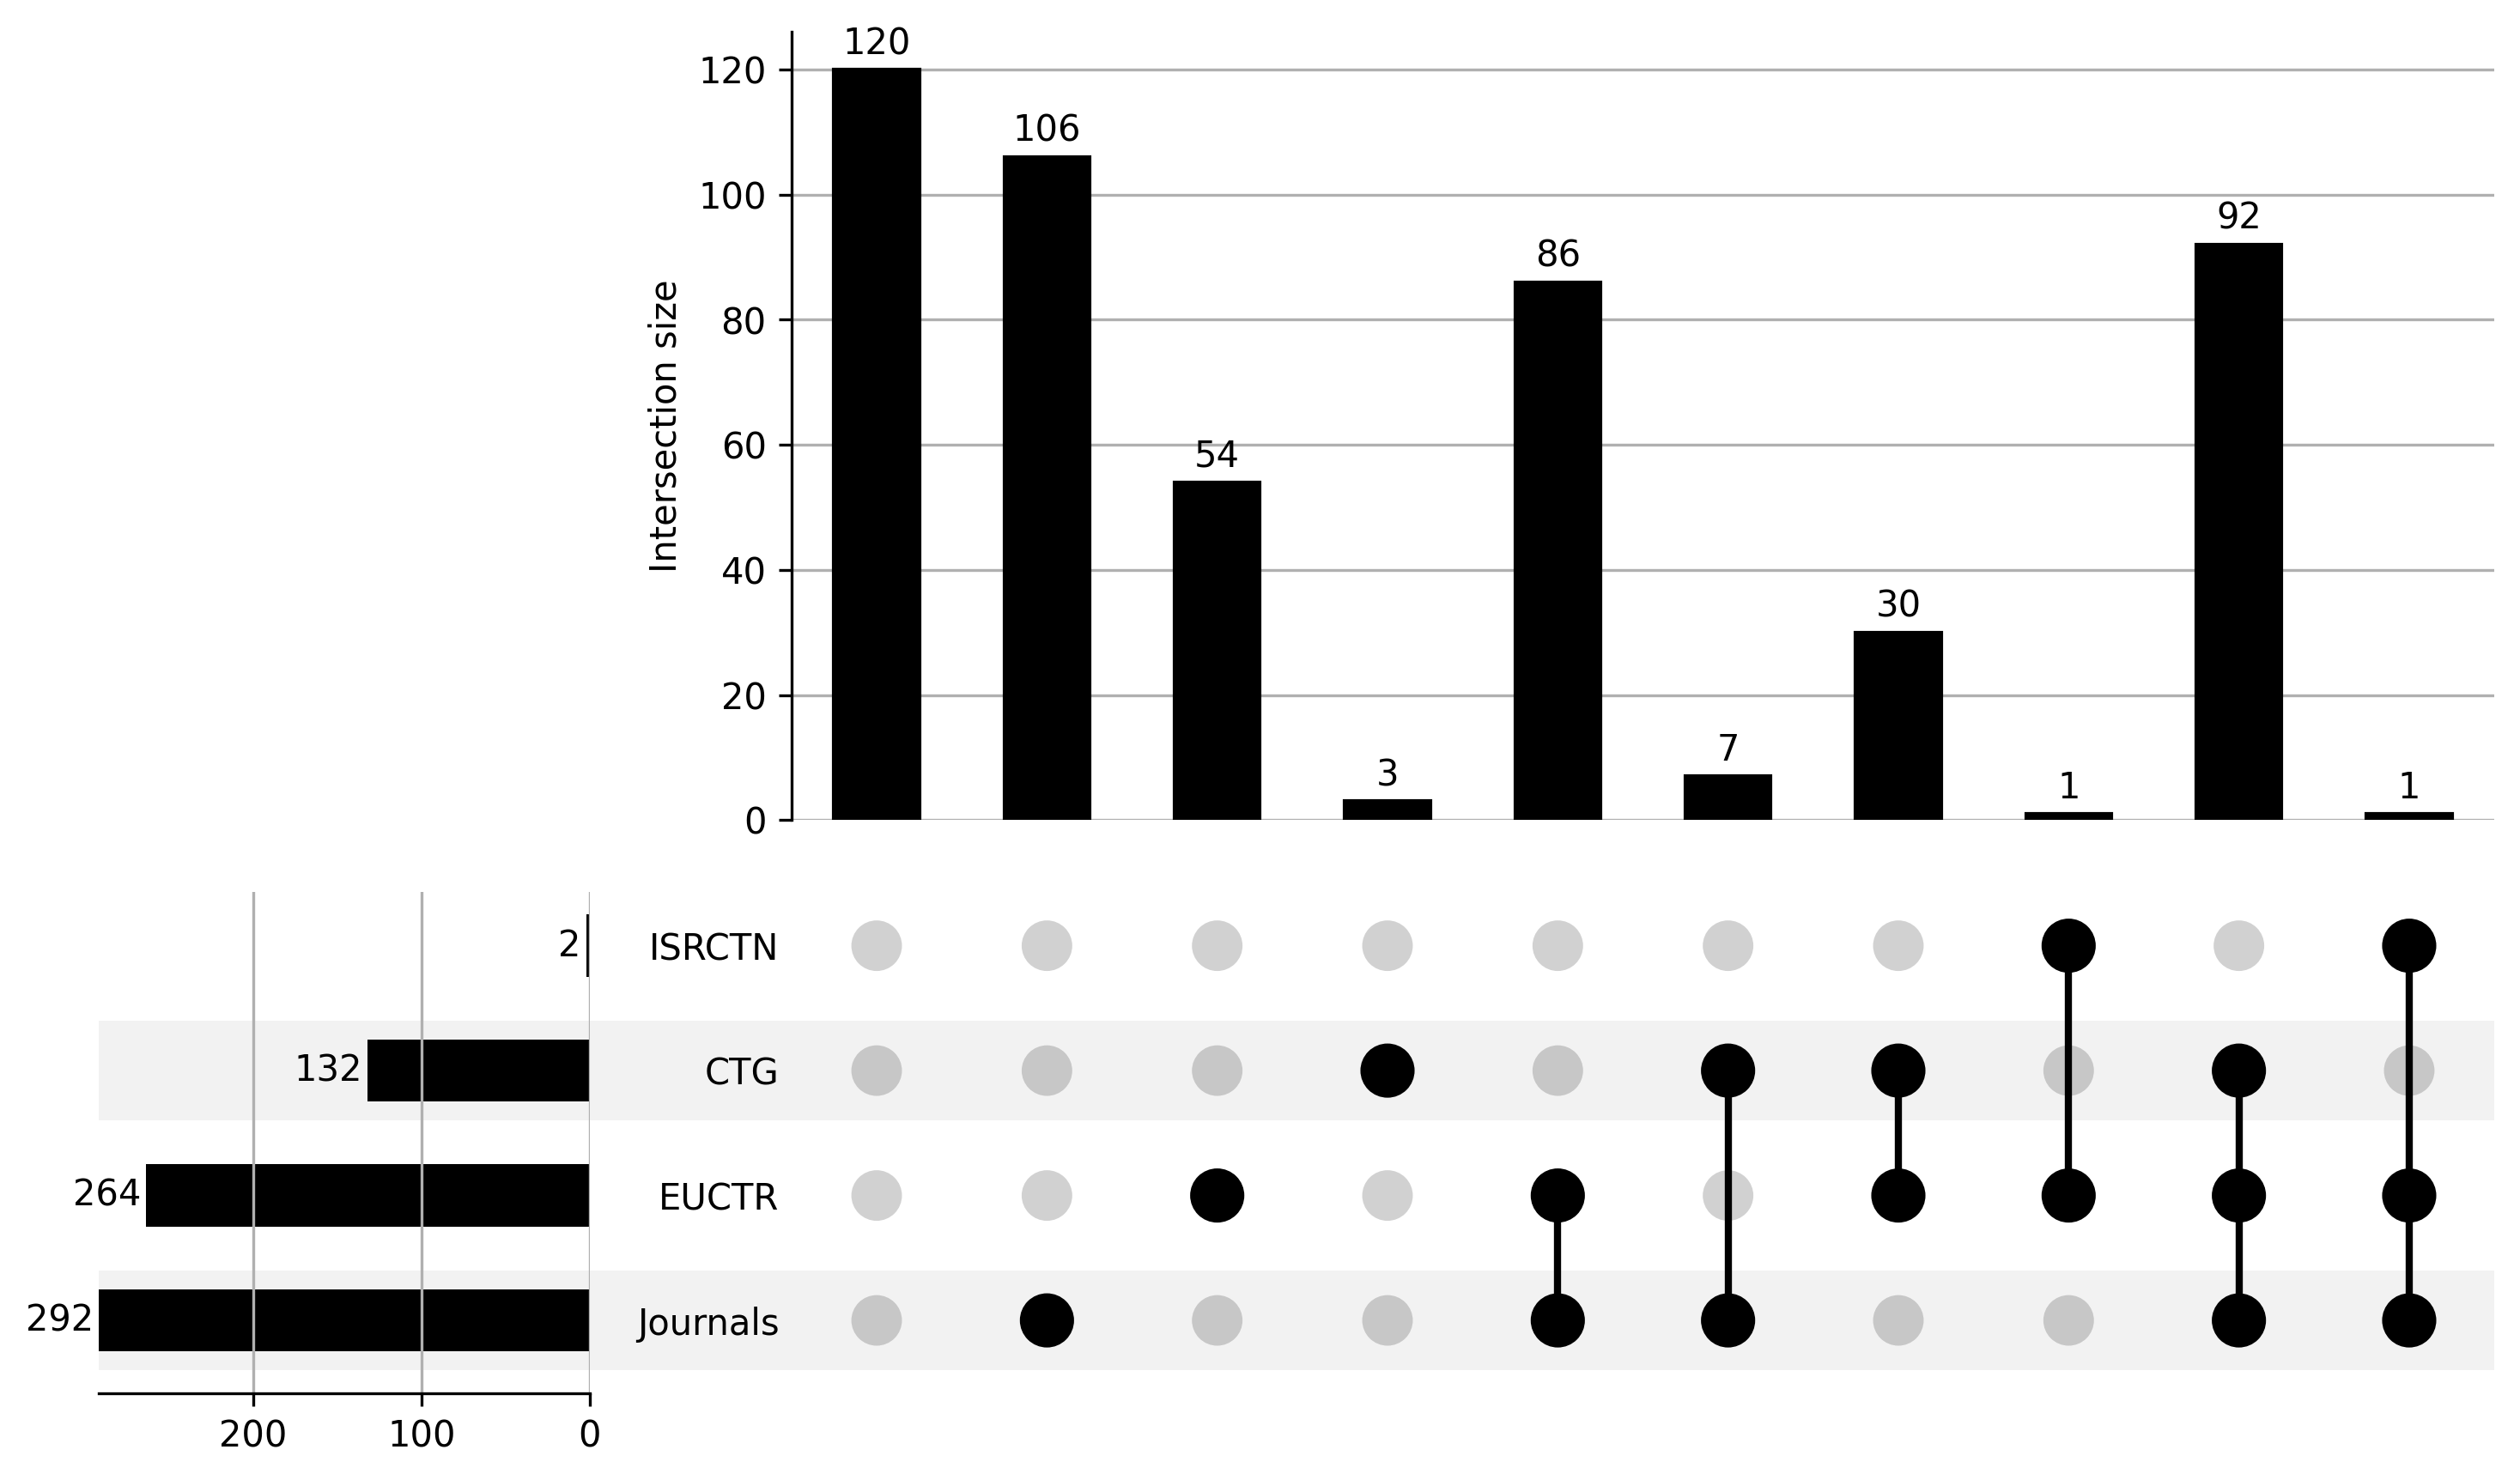

In [102]:
fig = plt.figure(figsize=(12, 7), dpi=300)
plot(from_indicators(["EUCTR", "CTG", "ISRCTN", "Journals"],
                      data=df), 
     sort_by='degree', 
     show_counts=True, 
     fig=fig, 
     element_size=None, 
     totals_plot_elements=3)

plt.show()
